# <center>『 밑바닥부터 시작하는 딥러닝 』</center>

<img src="http://image.kyobobook.co.kr/images/book/large/636/l9788968484636.jpg">

---

# 4장. 신경망 학습

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터에서-학습한다!" data-toc-modified-id="데이터에서-학습한다!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터에서 학습한다!</a></span><ul class="toc-item"><li><span><a href="#데이터-주도-학습" data-toc-modified-id="데이터-주도-학습-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터 주도 학습</a></span></li><li><span><a href="#훈련-데이터와-시험-데이터" data-toc-modified-id="훈련-데이터와-시험-데이터-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>훈련 데이터와 시험 데이터</a></span></li></ul></li><li><span><a href="#손실-함수" data-toc-modified-id="손실-함수-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>손실 함수</a></span><ul class="toc-item"><li><span><a href="#오차제곱합-(SSE)" data-toc-modified-id="오차제곱합-(SSE)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>오차제곱합 (SSE)</a></span></li><li><span><a href="#교차-엔트로피-오차-(CEE)" data-toc-modified-id="교차-엔트로피-오차-(CEE)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>교차 엔트로피 오차 (CEE)</a></span></li><li><span><a href="#미니배치-학습" data-toc-modified-id="미니배치-학습-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>미니배치 학습</a></span></li><li><span><a href="#(배치용)-교차-엔트로피-오차-구현하기" data-toc-modified-id="(배치용)-교차-엔트로피-오차-구현하기-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>(배치용) 교차 엔트로피 오차 구현하기</a></span></li><li><span><a href="#왜-손실-함수를-설정하는가?" data-toc-modified-id="왜-손실-함수를-설정하는가?-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>왜 손실 함수를 설정하는가?</a></span></li></ul></li><li><span><a href="#수치-미분" data-toc-modified-id="수치-미분-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>수치 미분</a></span><ul class="toc-item"><li><span><a href="#미분" data-toc-modified-id="미분-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>미분</a></span></li><li><span><a href="#수치-미분의-예" data-toc-modified-id="수치-미분의-예-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>수치 미분의 예</a></span></li><li><span><a href="#편미분" data-toc-modified-id="편미분-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>편미분</a></span></li></ul></li><li><span><a href="#기울기" data-toc-modified-id="기울기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>기울기</a></span><ul class="toc-item"><li><span><a href="#경사법(경사-하강법)" data-toc-modified-id="경사법(경사-하강법)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>경사법(경사 하강법)</a></span></li><li><span><a href="#신경망에서의-기울기" data-toc-modified-id="신경망에서의-기울기-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>신경망에서의 기울기</a></span></li></ul></li><li><span><a href="#학습-알고리즘-구현하기" data-toc-modified-id="학습-알고리즘-구현하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>학습 알고리즘 구현하기</a></span><ul class="toc-item"><li><span><a href="#신경망-학습-절차-복습" data-toc-modified-id="신경망-학습-절차-복습-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>신경망 학습 절차 복습</a></span></li><li><span><a href="#2층-신경망-클래스-구현하기" data-toc-modified-id="2층-신경망-클래스-구현하기-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>2층 신경망 클래스 구현하기</a></span></li><li><span><a href="#미니배치-학습-구현하기" data-toc-modified-id="미니배치-학습-구현하기-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>미니배치 학습 구현하기</a></span></li><li><span><a href="#시험-데이터로-평가하기" data-toc-modified-id="시험-데이터로-평가하기-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>시험 데이터로 평가하기</a></span></li></ul></li></ul></div>

--- 

이번 장의 주제는 **신경망 학습**입니다. 여기서 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것입니다. 신경망이 학습할 수 있도록 해주는 지표인 **손실 함수**의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표입니다. 손실 함수의 값을 가급적 작게 만드는 기법으로, **함수의 기울기를 활용하는 경사법**을 소개합니다.

## 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점입니다. 가중치 매개변수 값을 데이터를 보고 자동으로 결정한다는 뜻입니다.

### 데이터 주도 학습

신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배재할 수 있게 해주는 중요한 특성을 찾습니다. **특징(feature)**이란 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리킵니다.  

**기계 학습**에서는 모아진 데이터로부터 규칙을 찾아내는 역할은 '기계'가 담당하지만, 이미지를 벡터로 변환할 때 사용하는 특징은 '사람'이 설계합니다. 이 말은 적합한 특징을 쓰지 않으면 좋은 결과를 얻지 못한다는 말입니다. 반면 **신경망(딥러닝)** 방식은 사람이 개입하지 않습니다. 그리하여 딥러닝은 **종단간 기계학습(end-to-end mechine learning)**이라고도 합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/d9bacee1-a872-4bd2-adcc-2ce3510397b1/fig%204-2.png" width=50%>

### 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 **훈련 데이터(training data)**와 **시험 데이터(test data)**로 나눠 학습과 실험을 수행하는 것이 일반적입니다. 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾습니다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것입니다.  

그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없습니다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일도 벌어집니다. **한 데이터셋에만 지나치게 최적화된 상태**를 **오버피팅(overfitting)**이라고 합니다.

## 손실 함수

신경망 학습에서는 형재의 상태를 하나의 지표인 **손실 함수**로 표현하고, 이를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색합니다. '행복 지표'를 가진 사람이 그 지표를 근거로 '최적의 인생'을 탐색하듯, 신경망도 '손실 함수'를 기준으로 '최적의 매개변수 값'을 탐색합니다.  

이때, 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표입니다.

### 오차제곱합 (SSE)

가장 많이 쓰이는 손실 합수는 **오차제곱합(sum of squares for error, SSE)**입니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/1f308ef9-a787-44b2-b7d1-31753e849591/MSE.png" width=30%>

여기서 **y_k**는 **신경망의 출력(신경망이 추정한 값)**, **t_k**는 **정답 레이블**, **k**는 **데이터의 차원 수**를 나타냅니다.  

이때, 1/2는 미분을 쉽게 하기 위해 존재합니다.

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
ex_1 = sum_squares_error(np.array(y), np.array(t))

# 예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
ex_2 = sum_squares_error(np.array(y), np.array(t))

print('2 로 예측한 경우: {}, \n7 로 예측한 경우: {}'.format(ex_1, ex_2))

2 로 예측한 경우: 0.09750000000000003, 
7 로 예측한 경우: 0.5975


위의 예제 결과를 봤을 때, 오차제곱합 기준으로는 첫 번째 추정 결과가 오차가 더 작으므로 정답에 더 가까울 것으로 판단할 수 있습니다.

### 교차 엔트로피 오차 (CEE)

또 다른 손실 함수로서 **교차 엔트로피 오차(cross entropy error, CEE)**도 자주 이용합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/0e182974-46dc-42bd-bd74-146f7dd7737f/CEE.png" width=30%>

여기에서 log는 밑이 e인 자연로그(log_e)입니다. **y_k**는 **신경망의 출력**, **t_k**는 **정답 레이블**입니다.  
이때 t_k는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0인 원-핫 인코딩 형태이기 때문에 실질적으로 정답일 때의 추정(t_k가 1일 때의 y_k)의 자연로그를 계산하는 식이 됩니다.

In [4]:
def cross_entropy_error(y, t):
    # np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 
    # 더 이상 계산을 진행할 수 없게 되기 때문에 아주 작은 값을 더해서 0이 되지 않도록 함
    delta = 1e-7  
    return -np.sum(t * np.log(y + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
ex_1 = cross_entropy_error(np.array(y), np.array(t))

# 예2: '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]
ex_2 = cross_entropy_error(np.array(y), np.array(t))

print('2 로 예측한 경우: {}, \n7 로 예측한 경우: {}'.format(ex_1, ex_2))

2 로 예측한 경우: 0.510825457099338, 
7 로 예측한 경우: 2.302584092994546


즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치합니다.

### 미니배치 학습

지금까지는 데이터 하나에 대한 손실 합수만 생각해왔습니다. 이제부터는 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보겠습니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/2019fce0-df94-434d-9a26-7d793f5b0917/batch_CEE.png" width=30%>

데이터가 N개인 경우이고, **t_nk**는 **n번째 데이터의 k번째 값**을 의미합니다. 마지막에 N으로 나누어 정규화하고 있습니다. N으로 나눔으로써 '평균 손실 함수'를 구하는 것입니다.  

그런데 훈련 데이터의 개수가 너무 많아진다면 일일이 손실 함수를 계산하는 것은 현실적이지 않습니다. 이런 경우 데이터 일부를 추려 전체의 근사치로 이용합니다. **훈련 데이터로부터 일부만 골라 학습을 수행**하며, 이 **일부**를 **미니배치(mini-batch)**라고 합니다.

### (배치용) 교차 엔트로피 오차 구현하기

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.rasahep(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 왜 손실 함수를 설정하는가?

왜 **정확도**라는 지표를 놔두고 **손실 함수**라는 값이라는 우회적인 방법을 택하는 이유가 무엇일까요? 이 의문은 신경망 학습에서의 **미분**의 역할에 주목한다면 해결됩니다.  

신경망 학습에서는 손실 함수의 값을 가장 작게 하는 매개변수 값을 찾습니다. 이때 매개변수의 미분(정확히는 기울기)를 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.  
가중치 **매개변수의 손실 함수의 미분**이란 **가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하나**라는 의미입니다. 미분 값이 0이 될 때 가중치 매개변수의 갱신이 멈춥니다.  

정확도를 지표로 삼아서는 안 되는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문입니다. 

<img src="https://media.vlpt.us/images/jakeseo_me/post/08a50cb6-a1f9-4498-adeb-2bd46ec3ae23/fig%204-4.png" width=70%>

정확도를 계단 함수에, 손실 함수를 시그모이드 함수에 비유할 수 있습니다. 계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수는 출력이 연속적으로 변하고 곡선의 기울기도 변합니다. 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않습니다.

## 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정합니다. 기울기란 무엇인지, 또 어떤 성질이 있는지를 설명하기에 앞서, 이번 절에서는 **미분**부터 복습해보겠습니다.

### 미분

미분은 특정 순간의 변화량을 뜻합니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/d9d74dd0-107c-445f-bc7b-d4fa8349a96e/meboon.png" width=30%>

즉, x의 작은 변화가 함수 f(x)를 얼마나 변화시키느냐를 의미합니다. 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가깝게 한다는 의미를 lim으로 나타납니다.

In [7]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / (2)

위의 구현은 작은 값이 생략되어 최종 계산 결과에 오차가 생기는 **반올림 오차(rounding error)** 문제를 일으킵니다.

In [8]:
np.float32(1e-50)

0.0

또한 진정한 미분이 아니라 함수 f의 차분을 계산하는 한계가 있습니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/98fba7d4-7d0c-451a-9df1-09c0a367b5e7/fig%204-5.png" width=50%>

그리하여 다음과 같이 중심 차분(중앙 차분)을 통해 구현하기도 합니다. 다음은 나쁜 구현에서의 두 개선점을 적용해 다시 구현한 수치 미분입니다.  

(수치 미분이란 아주 작은 차분으로 미분하는 것을 말합니다.)

In [9]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 수치 미분의 예

In [10]:
import matplotlib.pylab as plt

In [11]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

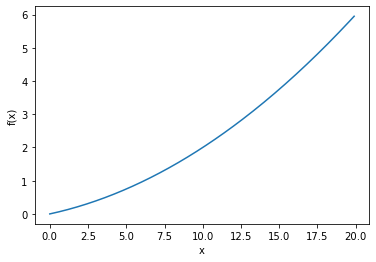

In [12]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)

plt.show()

In [13]:
numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(0.1999999999990898, 0.2999999999986347)

### 편미분

**편미분**이란 변수가 여럿인 함수에 대한 미분을 말합니다. 편미분은 앞의 예와 달리 변수가 2개라는 점에 주의해야 합니다.

In [14]:
def function_2(x):
    return x[0]**2 + x[1]**2

## 기울기

모든 변수의 편미분을 벡터로 정리한 것을 **기울기(gradient)**라고 합니다. 기울기는 다음과 같이 구현할 수 있습니다.

In [15]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [17]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

기울기는 각 지점에서 낮아지는 방향을 가리킵니다. 더 정확히 말하자면 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**입니다. 이건 중요한 포인트이니 확실히 기억하세요!

### 경사법(경사 하강법)

**< 경사법이란 >**

신경망은 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 합니다. 여기에서 최적이란 손실 합수가 최솟값이 될 때의 매개변수 값입니다. 그러나 매개변수의 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없습니다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 **경사법**입니다.

<img src="https://image.librewiki.net/thumb/4/4f/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_Local_minima.png/450px-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_Local_minima.png">

이때, 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것입니다. 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 그쪽이 정말로 나아갈 방향인지는 보장할 수 없습니다.  

    (경사 하강법은 국소적인 최솟값(local minima)을 찾을 수 있지만, 이것이 전역적인 최솟값(global minimum)이라는 보장은 없다!)

드디어 경사법이 등장할 차례입니다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동합니다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복합니다. 이렇게 해서 함수의 값을 점차 줄이는 것이 **경사법(gradient method)**입니다.

경사법은 최솟값을 찾는 경우 **경사 하강법(gradient descent method)**, 최댓값을 찾는 경우 **경사 상승법(gradient ascent method)**라고 합니다. 일반적으로 신경망(딥러닝) 분야에서의 경사법은 '경사 하감법'으로 등장할 때가 많습니다.

<img src="https://media.vlpt.us/images/jakeseo_me/post/1d5481d5-c66d-4c92-86d7-b4c8c83c8c60/gradient_descent_method_equation.png" width=30%>

**< 경사 하강법에서의 학습률 >**

경사법의 수식에서 **η(에타)**는 갱신하는 양을 나타냅니다. 이를 신경망 학습에서는 **학습률(learning rate)**이라고 합니다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률입니다. 위에서 나타낸 수식은 1회에 해당하는 갱신이고, 이 단계를 반복합니다.

<img src="https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTZfODcg/MDAxNTg0MzAxMTIzNzkx.30RyWOQ5ZR-Z2uJbeVJnHe-22HPsc6ap6tSpYJL0m1wg.dPzbux16yI1QpvQKyJztLVNGH87nIybM8A8-h5ITwHsg.PNG.jevida/031520_1938_Gradient3.png?type=w800">

학습률 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없습니다. 경사 하강법은 다음과 같이 간단하게 구현할 수 있습니다.

In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

문제: 경사법으로 x_0^2 + x_1^2의 최솟값을 구하라

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [20]:
cd C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch

C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch


In [21]:
from common.gradient import numerical_gradient

In [22]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
x

array([-6.11110793e-10,  8.14814391e-10])

아래 그래프는 경사법을 사용한 갱신 과정을 그림으로 나타낸 것입니다.

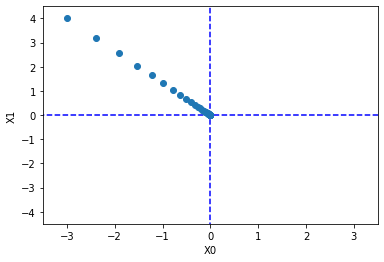

In [23]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률을 훨씬 크고, 작게 설정하여 실험해보겠습니다.

In [24]:
init_x = np.array([-3.0, 4.0])    

# 학습률이 너무 큰 예: lr=10.0
lr = 10
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
x

array([-2.58983747e+13, -1.29524862e+12])

In [25]:
init_x = np.array([-3.0, 4.0])    

# 학습률이 너무 작은 예: 1e-10
lr = 1e-10
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
x

array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산해버리고, 너무 작으면 거의 갱신되지 않은 채 끝나버립니다. 이것으로 학습률을 적저리 설정하는 일의 중요성을 알아보았습니다.

### 신경망에서의 기울기

신경망 학습에서도 기울기를 구해야 합니다. 여기서 말하는 기울기는 **가중치 매개변수에 대한 손실 함수의 기울기**입니다.

In [26]:
cd C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch

C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch


In [27]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보겠습니다.

In [28]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):           # 메서드1: 예측 수행
        return np.dot(x, self.W)

    def loss(self, x, t):           # 메서드2: 손실 함수 값 계산
        z = self.predict(x)         # x: 입력 데이터 / t: 정답 레이블
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [29]:
net = simpleNet()
print(net.W)

[[-0.44309177  0.27644505 -0.51857611]
 [-1.34200937  0.86297397 -0.55189285]]


In [30]:
# (1, 2) 내적 (2, 3) -> (1, 3)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.47366349  0.9425436  -0.80784924]


In [31]:
np.argmax(p) # 최댓값의 인덱스

1

In [32]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t) # 손실 함수 값 계산

1.9838544162261007

이어서 기울기를 구해보겠습니다.

In [33]:
def f(W):
    return net.loss(x, t)

# 새로운 함수를 정의할 때 lambda 기법을 쓰면 구현이 더 편함
# f = lambda w: net.loss(x, t)

In [34]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04240471  0.47507212 -0.51747683]
 [ 0.06360707  0.71260818 -0.77621525]]


이렇게 신경망의 기울기를 구한 다음에는 경사법에 따라 매개변수를 갱신하기만 하면 됩니다.

## 학습 알고리즘 구현하기

**신경망 학습의 중요 키워드**
- 손실 함수
- 미니 배치
- 기울기
- 경사 하강법

### 신경망 학습 절차 복습

---
- **전제**  
신경망에는 적응 가능한 **가중치**와 **편향**이 있고, 이 가중치와 편향을 **훈련 데이터에 적응하도록 조정**하는 과정을 **학습**이라고 합니다. 신경망 학습은 다음과 같은 4단계로 수행합니다.  
---
- **1단계: 미니배치**  
훈련 데이터 중 일부를 무작위로 가져옵니다. 이렇게 선별한 데이터를 **미니 배치**라 하며, 그 미니배치의 **손실 함수 값**을 줄이는 것이 목표입니다.  
---
- **2단계: 기울기 산출**  
미니배치의 손실 함수 값을 줄이기 위해 **각 가중치 매개변수의 기울기**를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.  
---
- **3단계: 매개변수 갱신**  
가중치 매개변수를 기울기 방향으로 아주 조금 갱신합니다.  
---
- **4단계: 반복**  
1~3 단계를 반복합니다.
---

이것이 신경망 학습이 이뤄지는 순서입니다. 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법(Stochastc Gradient Descent, SGD)**이라고 부릅니다. 대부분의 딥러닝 프레임워크는 SGD라는 함수로 이 기능을 구현하고 있습니다.

### 2층 신경망 클래스 구현하기

여기에서는 **2층 신경망(은닉층이 1개인 네트워크)**을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행합니다.

In [35]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

In [36]:
class TwoLayerNet:
    
    # 가중치 초기화를 수행한다.
    # 인수는 순서대로 입력층, 은닉층, 출력층의 뉴런 수
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01): 
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 1번째 가중치
        self.params['b1'] = np.zeros(hidden_size) # 1번째 편향
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측(추론)을 수행한다.
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실 함수의 값을 구한다.    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도를 구한다.
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # (1) 가중치 매개변수의 기울기를 구한다. 
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {} 
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # 1번째 가중치의 기울기
        grads['b1'] = numerical_gradient(loss_W, self.params['b1']) # 1번째 편향의 기울기
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
     
    # (2) 가중치 매개변수의 기울기를 구한다. / numerical_gradient()의 성능 개선판
    # 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

### 미니배치 학습 구현하기

처음에는 2층 신경망을 하나의 클래스로 구현하는 것부터 시작합니다. (코드를 주석으로 처리해둔 부분은 5.4에서 다루는 부분입니다.)  
그 전에 batch size와 epoch을 다시 이해하고 넘어가도록 합시다!

<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTAxMjNfMjU4/MDAxNTQ4MjM1Nzg3NTA2.UtvnGsckZhLHOPPOBWH841IWsZFzNcgwZvYKi2nxImEg.CdtqIxOjWeBo4eNBD2pXu5uwYGa3ZVUr8WZvtldArtYg.PNG.qbxlvnf11/20190123_182720.png?type=w800" width=60%>

In [37]:
cd C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch\ch04

C:\Users\kmmnj\Desktop\2021\DL\dl_from_scratch\deep_learning_from_scratch\ch04


In [38]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
import time

In [39]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [40]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다. (경사법에 의한 갱신 횟수)
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
# train_acc_list = []
# test_acc_list = []

In [41]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

학습을 시작해보겠습니다.

In [42]:
# 1에폭당 반복 수
# iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()

for i in range(iters_num):
    # 미니배치(100) 획득 -> 매번 60000개의 훈련 데이터에서 100개의 데이터를 추려냄
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    """
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
    """
    
print('총 소요 시간: {:.4f}'.format(time.time() - start_time))

총 소요 시간: 22.9962


갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가합니다. 이 손실 함수의 값이 변화하는 추이를 그래프로 나타내면 다음과 같습니다.

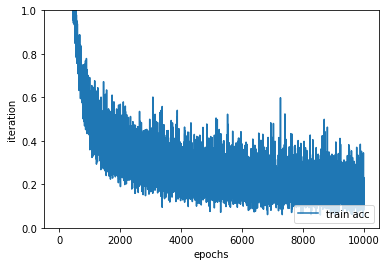

In [43]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
# plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("iteration")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

학습 횟수가 늘어가면서 손실 함수의 값이 줄어드는 것을 확인할 수 있습니다. 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미합니다. 다시 말해 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있습니다.

### 시험 데이터로 평가하기

5.3에서 손실 함수의 값이 서서히 내려가는 것을 확인했습니다. 다만, 이때의 손실 함수 값이란 **훈련 데이터의 미니배치에 대한 손실 함수**의 값입니다. 이 결과만으로는 다른 새로운 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않습니다. 다른 말로, **오버피팅**을 일으키지 않는지 확인해야 합니다.  

이를 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록합니다.

In [44]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [45]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다. (경사법에 의한 갱신 횟수)
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [46]:
# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()

for i in range(iters_num):
    # 미니배치(100) 획득 -> 매번 60000개의 훈련 데이터에서 100개의 데이터를 추려냄
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        # print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
        print('train acc: {:.4f} | test acc: {:.4f}'.format(train_acc, test_acc))

print('총 소요 시간: {:.4f}'.format(time.time() - start_time))

train acc: 0.0903 | test acc: 0.0892
train acc: 0.7756 | test acc: 0.7833
train acc: 0.8759 | test acc: 0.8778
train acc: 0.8984 | test acc: 0.9024
train acc: 0.9076 | test acc: 0.9099
train acc: 0.9131 | test acc: 0.9156
train acc: 0.9189 | test acc: 0.9222
train acc: 0.9229 | test acc: 0.9245
train acc: 0.9276 | test acc: 0.9282
train acc: 0.9307 | test acc: 0.9319
train acc: 0.9337 | test acc: 0.9342
train acc: 0.9365 | test acc: 0.9367
train acc: 0.9387 | test acc: 0.9399
train acc: 0.9413 | test acc: 0.9406
train acc: 0.9436 | test acc: 0.9430
train acc: 0.9441 | test acc: 0.9438
train acc: 0.9461 | test acc: 0.9434
총 소요 시간: 35.1475


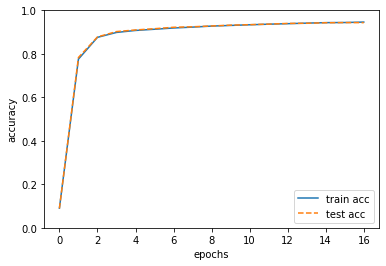

In [47]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

그래프를 보면 알 수 있듯이 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있습니다. 또, 두 정확도에는 차이가 없음을 알 수 있습니다. 다시 말해 오버피팅이 일어나지 않았습니다. (아래의 그래프가 오버피팅이 일어났을 때의 그래프입니다.)

<img src="https://t1.daumcdn.net/cfile/tistory/99F2953D5B76CCA20B" width=40%>